### Data Science Practicum II

#### Stock Price Analysis

In [1]:
# Import the required libraries
import os  
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
from pylab import mpl, plt
import seaborn as sns
sns.set_style('whitegrid')
plt.style.use("fivethirtyeight")

plt.style.use('seaborn')
mpl.rcParams['font.family'] = 'serif'
        
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

### Loading the Data

The data for the stock price analysis is collected from yahoo finance site: 

I have downloaded three companies stock price data - SPY, APPLE and MICROSOFT.

The CSV files downloaded from yahoo contains columns like- Date, Open, High, Low, Close, Adj Close, and Volume. In this project we will make use of two columns - Date and Adj Close.

The below code reads the stock data(adjusted close) for given symbols('SPY', 'AAPL' and 'MSFT') from the CSV files.

The data is collected between '10/17/2019' to '10/14/2022'.

In [2]:
os.environ['MARKET_DATA_DIR'] = '/Users/keerthiparepally/Downloads/'

In [3]:
os.environ['MARKET_DATA_DIR']

'/Users/keerthiparepally/Downloads/'

In [4]:
def symbol_to_path(symbol, base_dir=None): 
    """Return CSV file path given ticker symbol."""  
    if base_dir is None: 
        base_dir = os.environ.get("MARKET_DATA_DIR", "./data/")  
    return os.path.join(base_dir, "{}.csv".format(str(symbol)))

In [5]:
def get_data(symbols, dates, addSPY=True, colname="Adj Close"):
    """Read stock data (adjusted close) for given symbols from CSV files."""  
    df = pd.DataFrame(index=dates)
    if addSPY and "SPY" not in symbols: # add SPY for reference, if absent  
        symbols = ["SPY"] + list( 
            symbols
        )  # handles the case where symbols is np array of 'object' 
 
    for symbol in symbols:
        df_temp = pd.read_csv( 
            symbol_to_path(symbol),  
            index_col="Date",  
            parse_dates=True, 
            usecols=["Date", colname], 
            na_values=["nan"], 
        ) 
        df_temp = df_temp.rename(columns={colname: symbol})  
        df = df.join(df_temp)
        if symbol == "SPY":  # drop dates SPY did not trade 
            df = df.dropna(subset=["SPY"]) 
 
    return df 

In [6]:
symbols = ['AAPL','MSFT']
startdate = pd.to_datetime('10/17/2019')
enddate = pd.to_datetime('10/14/2022')
dates = pd.date_range(startdate,enddate,freq='d')
df = get_data(symbols, dates, addSPY=True, colname="Adj Close")

### Exploratory Data Analysis

#### Print the first 5 rows of the data

In [7]:
df.head(5)

,SPY,AAPL,MSFT
2019-10-17,285.208099,57.547443,135.725052
2019-10-18,283.959747,57.823837,133.509750
2019-10-21,285.884735,58.826672,134.500824
2019-10-22,284.950806,58.692139,132.499283
2019-10-23,285.779907,59.479725,133.344589


The dataset contains 3 columns- SPY, AAPL, and MSFT. Here the index is DatetimeIndex, which means we are dealing with time series data.

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 754 entries, 2019-10-17 to 2022-10-13
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   SPY     754 non-null    float64
 1   AAPL    754 non-null    float64
 2   MSFT    754 non-null    float64
dtypes: float64(3)
memory usage: 43.6 KB


#### Check for Null values

In [9]:
df.isnull().sum()

SPY     0
AAPL    0
MSFT    0
dtype: int64

There are no null values in the dataset.

### Data Visualization

#### SPY Closing Price

From the below graph we can see that there is a sudden drop in stocks during April 2020 this might be due to the covid effect and then we can again see a gradual increase.

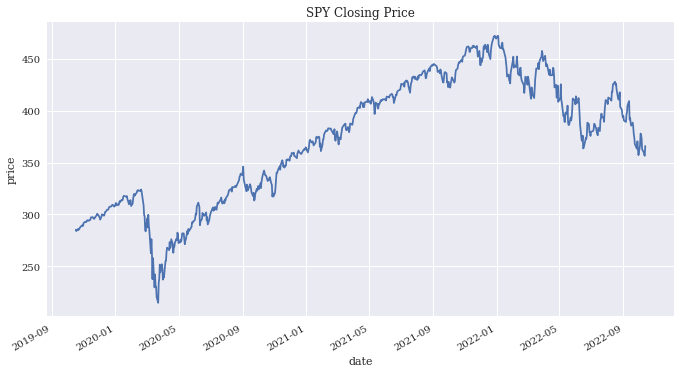

In [10]:
df.SPY.plot(figsize=(10, 6), title = 'SPY Closing Price')
plt.xlabel('date')
plt.ylabel('price')
plt.show()

#### Apple Closing Price

From the below graph we can see that even the Apple closing price has drop down in stocks during March 2020, but then again there is a gradual increase but peak increase during Januray 2022.

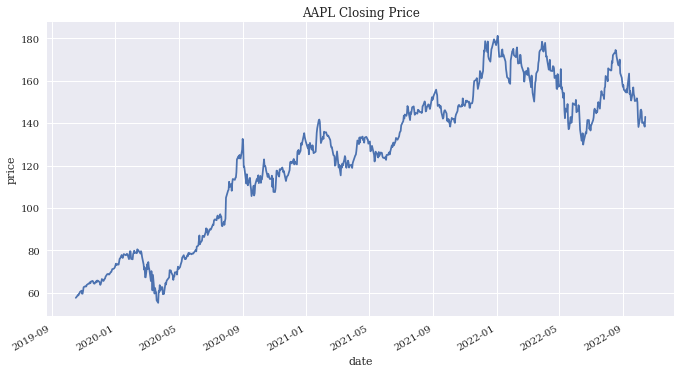

In [11]:
df.AAPL.plot(figsize=(10, 6), title = 'AAPL Closing Price')
plt.xlabel('date')
plt.ylabel('price')
plt.show()

#### Microsoft Clsoing Price

From the below graph we can see that even the Microsoft closing price has drop down in stocks during March 2020, but then again there is a gradual increase but peak increase during end of 2021 to early 2022.

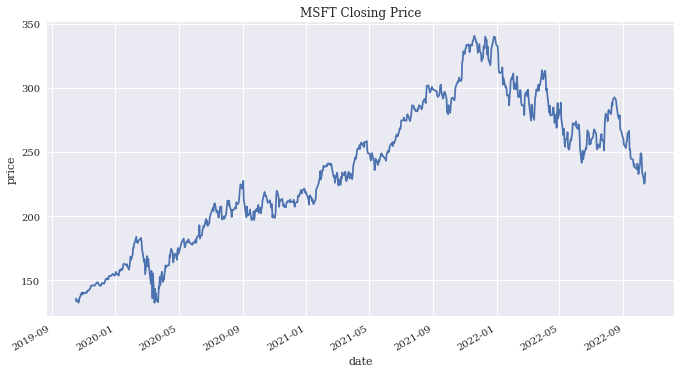

In [12]:
df.MSFT.plot(figsize=(10, 6), title = 'MSFT Closing Price')
plt.xlabel('date')
plt.ylabel('price')
plt.show()

#### Closing Price of SPY, APPLE and MICROSOFT

From the below graph we can compare the closing price for all the three companies.

We can see that SPY stock price is much higher than the other two companies.

And we can also see that all the three stock prices are dropped during the early 2020 this might be due to the the covid.

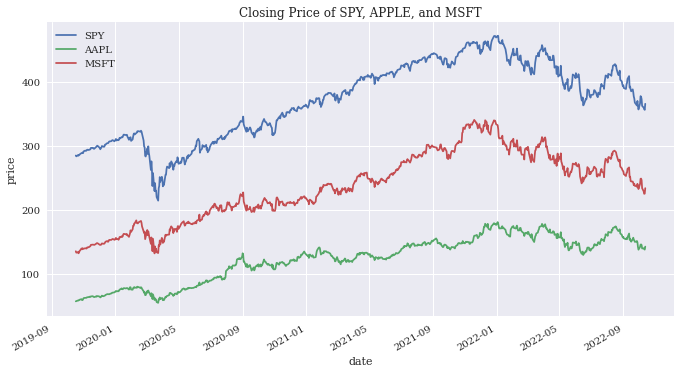

In [13]:
df.plot(figsize=(10, 6), title = 'Closing Price of SPY, APPLE, and MSFT')
plt.xlabel('date')
plt.ylabel('price')
plt.show()

In [14]:
# column means
df.mean() # defaults to axis=0.

SPY     371.972378
AAPL    124.053374
MSFT    236.858945
dtype: float64

In [15]:
# Standard deviation
df.std()

SPY     60.369073
AAPL    34.632152
MSFT    54.384236
dtype: float64

### Normalized Data

In [16]:
start_val = 1000000

allocs = [0.4, 0.4, 0.1]  

k=252  # daily k, for weekly data use 52

normed = df/df.iloc[0]  # normed df has first row of all ones

In [17]:
# First 10 rows of Normalized dataset
normed.head(10)

,SPY,AAPL,MSFT
2019-10-17,1.000000,1.000000,1.000000
2019-10-18,0.995623,1.004803,0.983678
2019-10-21,1.002372,1.022229,0.990980
2019-10-22,0.999098,1.019891,0.976233
2019-10-23,1.002005,1.033577,0.982461
2019-10-24,1.003642,1.035277,1.001790
2019-10-25,1.007752,1.048028,1.007445
2019-10-28,1.013432,1.058526,1.032214
2019-10-29,1.013131,1.034045,1.022478
2019-10-30,1.016239,1.033917,1.035221


### Plot graph for Normalized data

Here we can see that know it is easy to compare the different stock prices after normalizing the data.

From the graph we can see that all the three stock prices are almost in the same way until early 2020and then there is a slight increase in all the three stocks but APPLE has more increase in the stocks compared to other two companies in 2022.

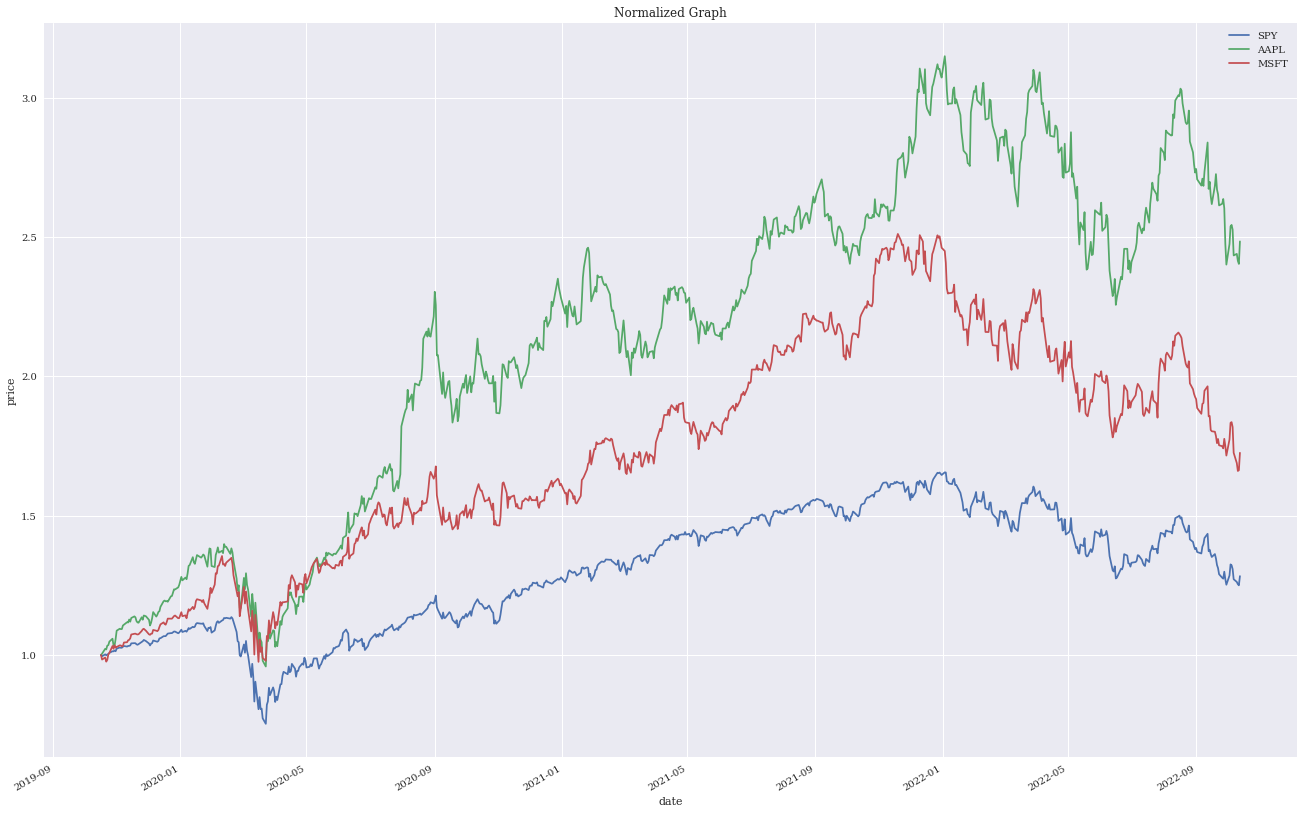

In [18]:
normed.plot(figsize = (20,15), title = 'Normalized Graph')
plt.xlabel('date')
plt.ylabel('price')
plt.show()

In [19]:
alloced = normed * allocs  # normed times the percent allocation for each stock

In [20]:
pos_vals = alloced * start_val  # allocation times the start value of each stock.  Subsequent rows show new value

In [21]:
port_val = pos_vals.sum(axis=1)  # sum columns, each row has total value of portfolio for that day

print("portfolio value:\n",port_val)

portfolio value:
 2019-10-17    9.000000e+05
2019-10-18    8.985382e+05
2019-10-21    9.089386e+05
2019-10-22    9.052190e+05
2019-10-23    9.124789e+05
                  ...     
2022-10-07    1.655127e+06
2022-10-10    1.649860e+06
2022-10-11    1.633824e+06
2022-10-12    1.627971e+06
2022-10-13    1.679745e+06
Length: 754, dtype: float64


In [22]:
daily_rets = (df / df.shift(1)) - 1

daily_rets = daily_rets[1:]  # first row is always zero.  This just includes second row on in the df

cum_ret = (port_val[-1]/port_val[0] - 1)  # cumulative return.  Change in value from beginning to end

print("Cumulative return:\n",cum_ret)

Cumulative return:
 0.8663828466029149


In [23]:
# average daily return
avg_daily_ret = daily_rets.mean()  

print("Average Daily return:\n",avg_daily_ret)

Average Daily return:
 SPY     0.000449
AAPL    0.001461
MSFT    0.000945
dtype: float64


In [24]:
# std dev of daily return
std_daily_ret = daily_rets.std()    

print("Average std:\n",std_daily_ret)

Average std:
 SPY     0.015291
AAPL    0.022433
MSFT    0.020982
dtype: float64


In [25]:
daily_rf = 0

SR = np.sqrt(k) * np.mean(daily_rets - daily_rf) / np.std(daily_rets)  # Sharpe ratio.  k is number of samples per year.

print("Sharpes ratio:\n", SR)

Sharpes ratio:
 SPY     0.466202
AAPL    1.034505
MSFT    0.715664
dtype: float64


In [26]:
daily_returns = (df / df.shift(1)) - 1 # df.shift(1) pushes who df down one row and leaves NaN in first row.   daily_returns.iloc[0, :] = 0 # Pandas leaves the 0th row full of Nans

In [27]:
df.kurtosis()  # positive means fat tails, negative means thin tails

SPY    -1.027198
AAPL   -0.969571
MSFT   -0.960963
dtype: float64

### Correlation Matrix

In [28]:
# correlation matrix for all the columns in df
df.corr(method='pearson')  

,SPY,AAPL,MSFT
SPY,1.000000,0.926312,0.960727
AAPL,0.926312,1.000000,0.943683
MSFT,0.960727,0.943683,1.000000


### Simple Moving Average

Trading based on simple moving averages (SMAs) is a decades-old trading approach. It is financial tradition to work with rolling statistics, often also called financial indicators or financial studies.

Financial market indicators are used by analysts to assess current market conditions and forecast the future trajectory of markets 

Below we have calculated SMA values for two different rolling window sizes, Shorter SMA value = 20, and longer SMA value = 100.

In [29]:
df1 = normed

SMA1 calculates the value for the shorter SMA.
SMA2 calculates the value for the longer SMA.

SMA1=20 and SMA2=100 are the “right” ones. In general, investors prefer higher returns to lower returns

In [30]:
SMA1 = 20
SMA2 = 100

df1['SPY_SMA1'] = df1['SPY'].rolling(SMA1).mean()  # calculates the rolling mean value.
df1['SPY_SMA2'] = df1['SPY'].rolling(SMA2).mean() 

df1['AAPL_SMA1'] = df1['AAPL'].rolling(SMA1).mean()  
df1['AAPL_SMA2'] = df1['AAPL'].rolling(SMA2).mean() 

df1['MSFT_SMA1'] = df1['MSFT'].rolling(SMA1).mean()  
df1['MSFT_SMA2'] = df1['MSFT'].rolling(SMA2).mean() 

In [31]:
# maintaining Seperate columns for plotting SPY, amazon and Google stock prices and with respective rolling means.
SPY_rolling = ['SPY', 'SPY_SMA1', 'SPY_SMA2']
AAPL_rolling = ['AAPL', 'AAPL_SMA1', 'AAPL_SMA2']
MSFT_rolling =['MSFT','MSFT_SMA1','MSFT_SMA2']

### SPY stock price and two simple moving averages

We can observe that the SPY_SMA1 and SPY_SMA2 have smooth curves without any fluctuations

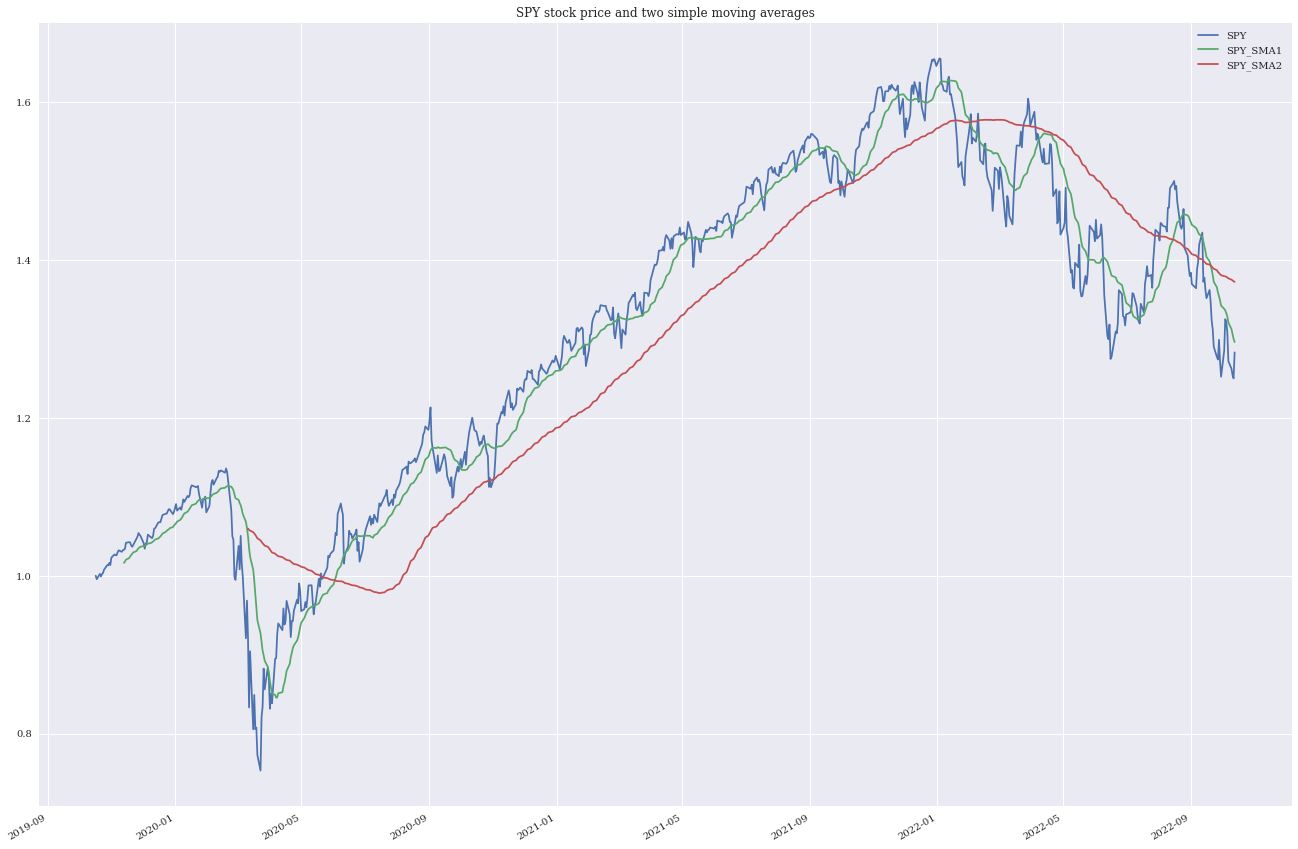

In [32]:
df1[SPY_rolling].plot(figsize= (20, 16), title ='SPY stock price and two simple moving averages')

### APPLE stock price and two simple moving averages

We can see three time series of APPLE visually. We can observe that the AAPL_SMA1 and AAPL_SMA2 have smooth curves without any fluctuations.

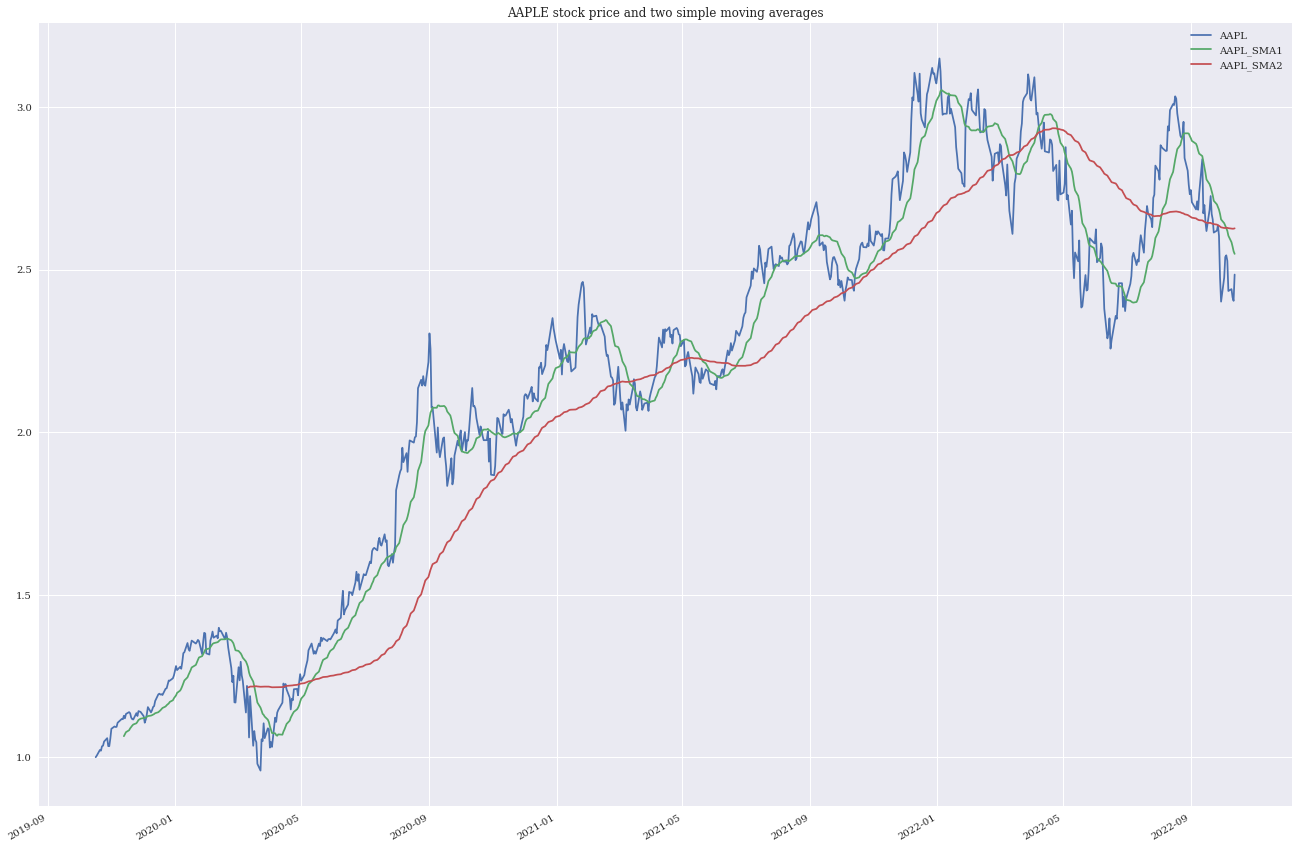

In [33]:
df1[AAPL_rolling].plot(figsize= (20, 16), title ='AAPLE stock price and two simple moving averages')

### MICROSOFT stock price and two simple moving averages

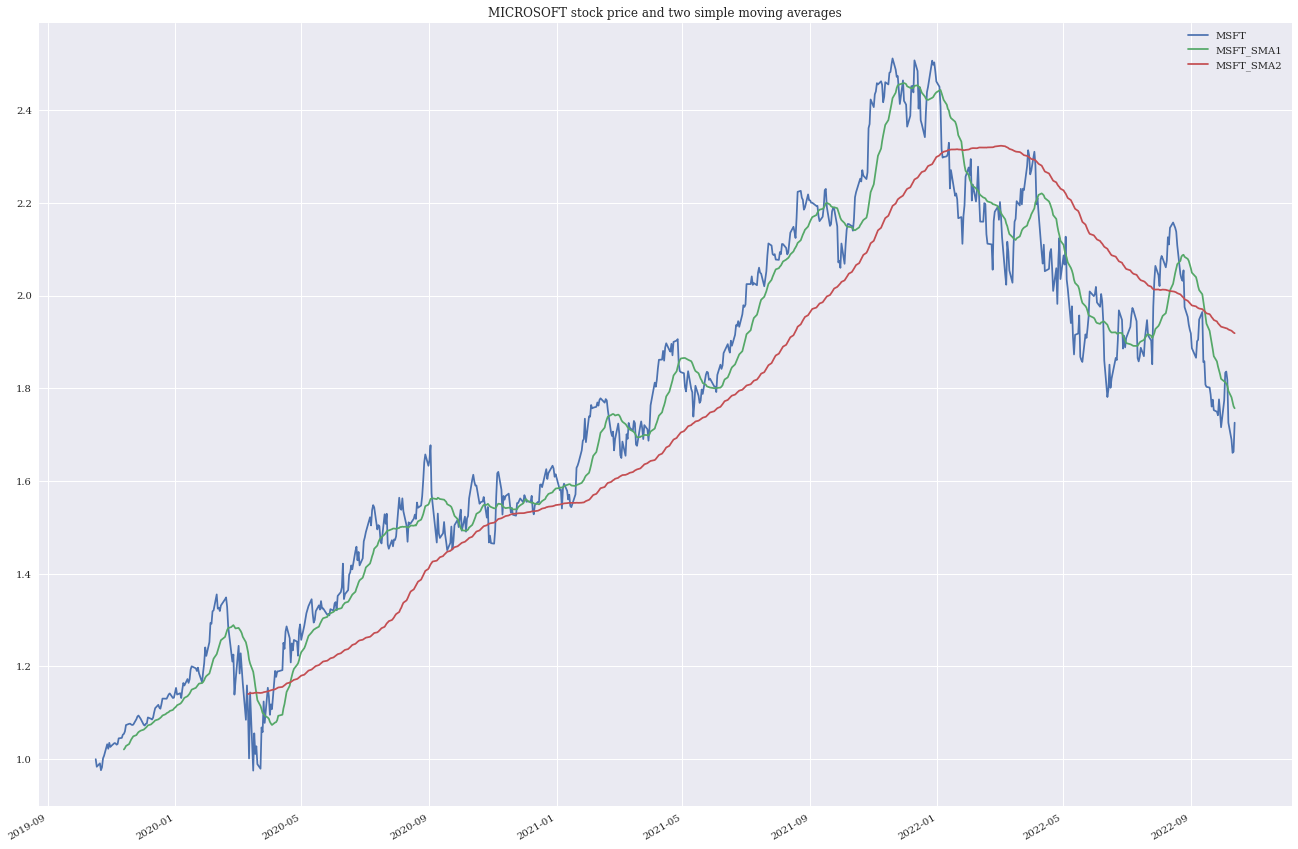

In [34]:
df1[MSFT_rolling].plot(figsize= (20, 16), title ='MICROSOFT stock price and two simple moving averages')

### Stock Prices and two moving averages for all the data

Below figures shows the two moving averages for all the different companies in one graph. It's bit hard to understand everything in a single graph.

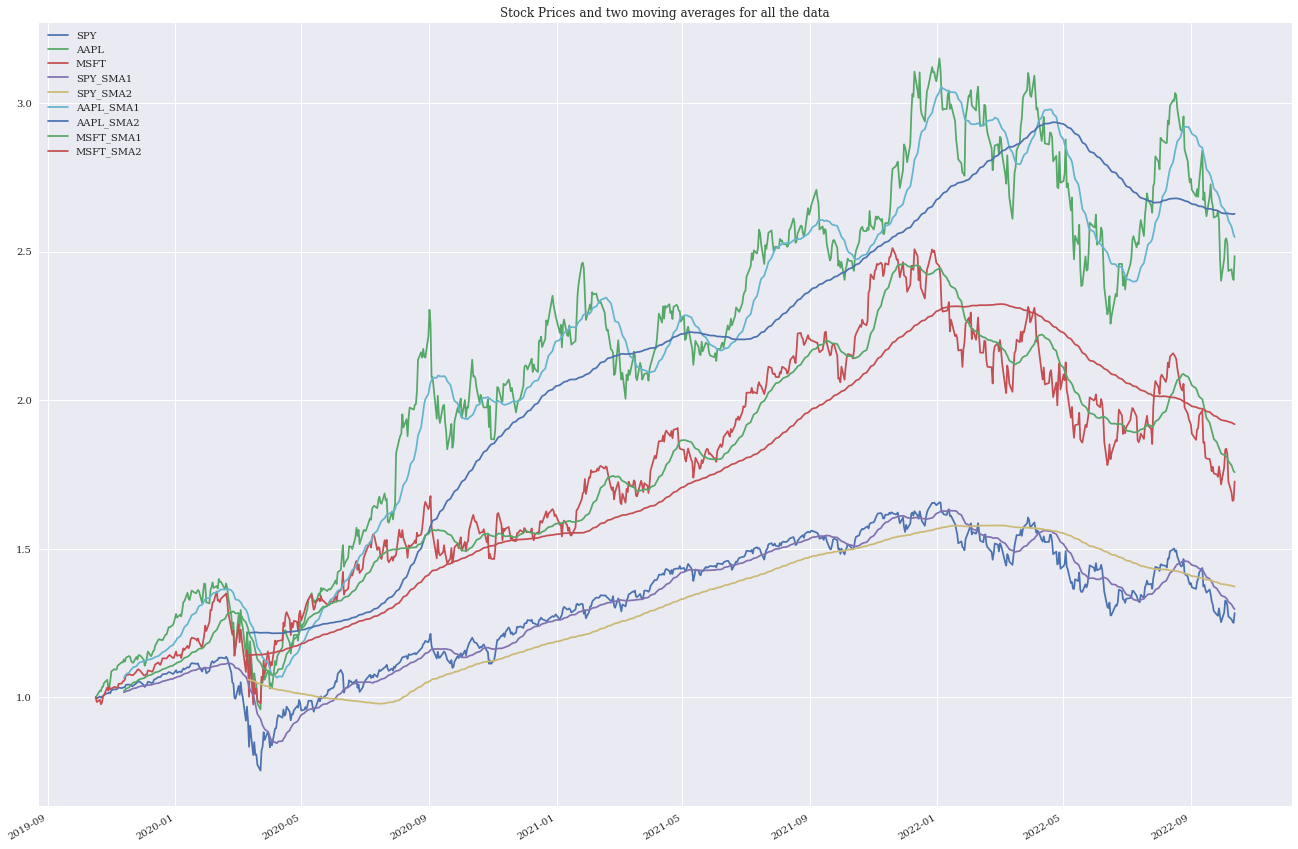

In [35]:
df1.plot(figsize= (20, 16), title ='Stock Prices and two moving averages for all the data')

In [36]:
df1.head(5) # display first 5 rows of present data

,SPY,AAPL,MSFT,SPY_SMA1,SPY_SMA2,AAPL_SMA1,AAPL_SMA2,MSFT_SMA1,MSFT_SMA2
2019-10-17,1.000000,1.000000,1.000000,NaN,NaN,NaN,NaN,NaN,NaN
2019-10-18,0.995623,1.004803,0.983678,NaN,NaN,NaN,NaN,NaN,NaN
2019-10-21,1.002372,1.022229,0.990980,NaN,NaN,NaN,NaN,NaN,NaN
2019-10-22,0.999098,1.019891,0.976233,NaN,NaN,NaN,NaN,NaN,NaN
2019-10-23,1.002005,1.033577,0.982461,NaN,NaN,NaN,NaN,NaN,NaN


### Derivation of Positions

Go long (= +1) when the shorter SMA is above the longer SMA
Go long (= -1) when the shorter SMA is below the longer SMA

In [37]:
df1.dropna(inplace = True) 

df1['SPY_Position'] = np.where(df1['SPY_SMA1'] > df1['SPY_SMA2'], 1, -1) # go long on the stock (put a 1), Otherwise, go short on the stock (put a -1)
df1['AAPL_Position'] = np.where(df1['AAPL_SMA1'] > df1['AAPL_SMA2'], 1, -1) 
df1['MSFT_Position'] = np.where(df1['MSFT_SMA1'] > df1['MSFT_SMA2'], 1, -1)

In [38]:
# maintaining Seperate columns for plotting SPY, amazon and Google stock prices and with respective rolling means and positions.
SPY_position =['SPY', 'SPY_SMA1', 'SPY_SMA2','SPY_Position']
AAPL_position =['AAPL','AAPL_SMA1', 'AAPL_SMA2', 'AAPL_Position']
MSFT_position =['MSFT','MSFT_SMA1','MSFT_SMA2','MSFT_Position']

### SPY stock price, two SMAs and resulting positions

From the below graph we can observe that from the past three years, the strategy leads to two periods during which the SPY stock should be shorted, the differences in the performance can only result from these two periods.

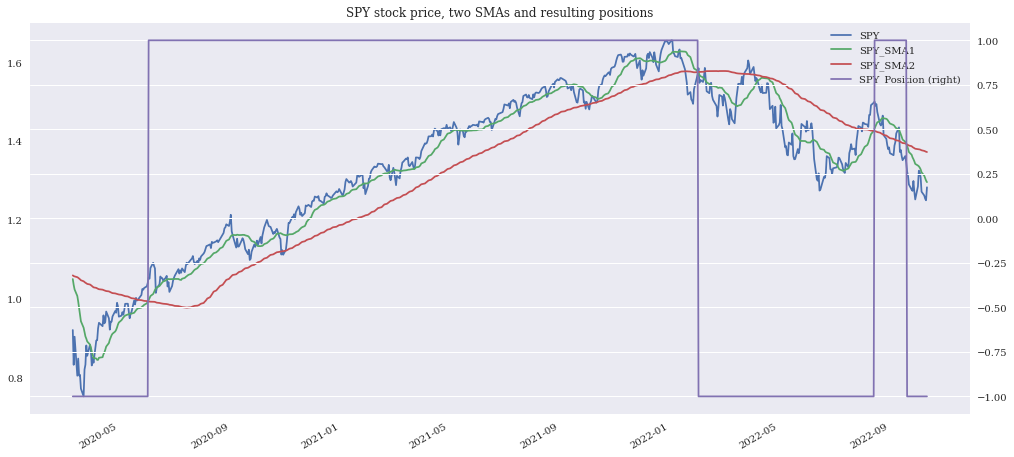

In [39]:
ax = df1[SPY_position].plot(secondary_y='SPY_Position', figsize=(15, 8), title ='SPY stock price, two SMAs and resulting positions')
ax.get_legend();

### AAPLE stock price, two SMAs and resulting positions

The strategy leads to five periods during which the aaple stock price have been shorted in the past three years, the differences in performance can only lead from these five periods.

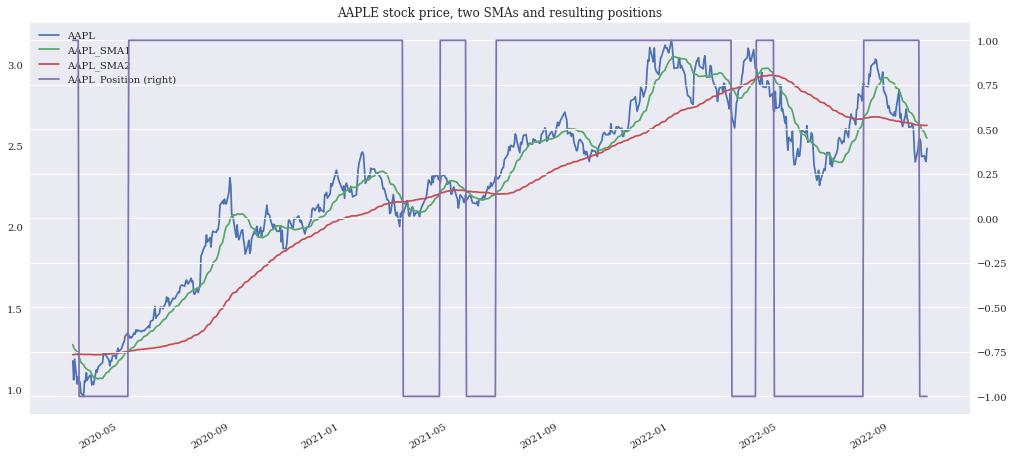

In [40]:
ax = df1[AAPL_position].plot(secondary_y='AAPL_Position', figsize=(15, 8), title ='AAPLE stock price, two SMAs and resulting positions')
ax.get_legend();

### MICROSOFT stock price, two SMAs and resulting positions

The strategy leads to two periods during which the microsoft stock price have been shorted in the past three years, the differences in performance can only lead from these two periods.

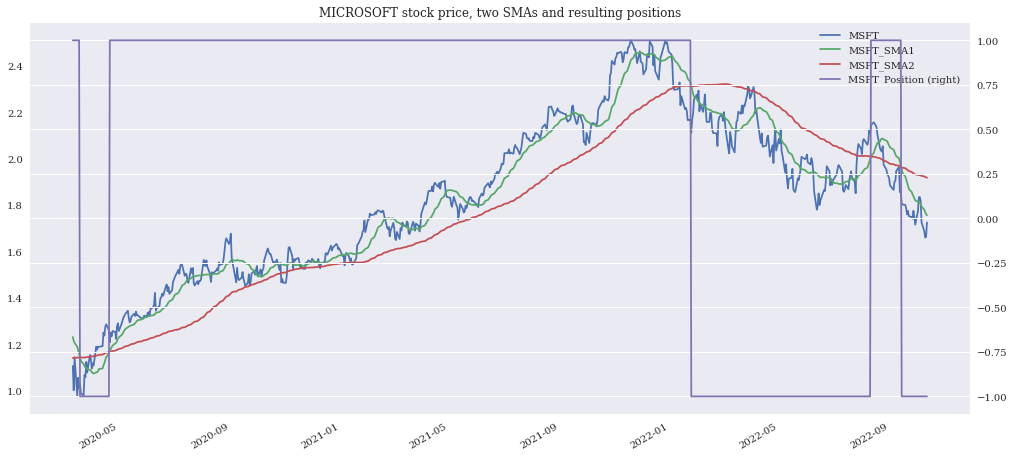

In [41]:
ax = df1[MSFT_position].plot(secondary_y='MSFT_Position', figsize=(15, 8), title ='MICROSOFT stock price, two SMAs and resulting positions')
ax.get_legend();

### Vectorized Backtesting

#### Vectorized Backtesting for SPY stock

In the vectorized backtesting first we calculate the log returns. Next, the positionings, represented as +1 and -1 are multiplied with relevant returns.

Here the long position earns the positive return of stock price and short position earns the negative return of stock price.

Finally, the log returns for the spy stock and the algorithmic trading strategy based on SMAs need to be added up and the exponential function applied to arrive at the performance values

In [42]:
df1['SPY_Returns'] = np.log(df1['SPY'] / df1['SPY'].shift(1)) # log return of SPY stock  

df1['SPY_Strategy'] = df1['SPY_Position'].shift(1) * df1['SPY_Returns']   #Multiplies the position values, shifted by one day, by the log returns of the SPY stock; the shift is required to avoid a foresight bias

df1.round(4).head()

,SPY,AAPL,MSFT,SPY_SMA1,SPY_SMA2,AAPL_SMA1,AAPL_SMA2,MSFT_SMA1,MSFT_SMA2,SPY_Position,AAPL_Position,MSFT_Position,SPY_Returns,SPY_Strategy
2020-03-11,0.9212,1.1769,1.1065,1.0505,1.0598,1.2774,1.2148,1.2315,1.1407,-1,1,1,NaN,NaN
2020-03-12,0.8331,1.0607,1.0016,1.0355,1.0581,1.2605,1.2154,1.2152,1.1407,-1,1,1,-0.1006,0.1006
2020-03-13,0.9043,1.1878,1.1440,1.0241,1.0572,1.2505,1.2173,1.2064,1.1423,-1,1,1,0.0820,-0.0820
2020-03-16,0.8054,1.0350,0.9754,1.0077,1.0553,1.2328,1.2174,1.1886,1.1422,-1,1,1,-0.1159,0.1159
2020-03-17,0.8488,1.0805,1.0557,0.9936,1.0537,1.2187,1.2180,1.1742,1.1430,-1,1,1,0.0526,-0.0526


In [43]:
df1.dropna(inplace=True)
# Sums up the log returns for the strategy and the benchmark investment and calculates the exponential value to arrive at the absolute performance.
np.exp(df1[['SPY_Returns', 'SPY_Strategy']].sum())  

SPY_Returns     1.392870
SPY_Strategy    1.262025
dtype: float64

In [44]:
# Calculates the annualized volatility for the strategy and the benchmark investment.
df1[['SPY_Returns', 'SPY_Strategy']].std() * 252 ** 0.5  

SPY_Returns     0.243163
SPY_Strategy    0.243231
dtype: float64

To gain a better picture of the overall performance, the below graph shows the performance of the SPY stock and the algorithmic trading strategy over time

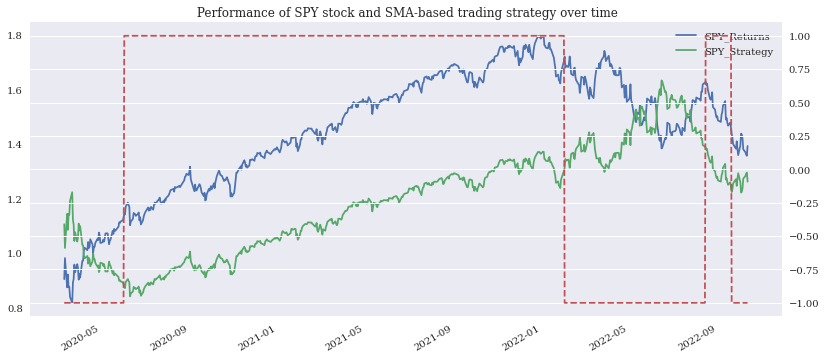

In [45]:
ax = df1[['SPY_Returns', 'SPY_Strategy']].cumsum(
                 ).apply(np.exp).plot(figsize=(12, 6))
df1['SPY_Position'].plot(ax=ax, secondary_y='SPY_Position', style='--', title =' Performance of SPY stock and SMA-based trading strategy over time')
ax.get_legend();

#### Vectorized Backtesting for AAPLE stock

Here first the log returns are calculated and then the positions are multiplied with relevant returns.

The long position earns the positive return of stock price and short position earns the negative return of stock price

In [46]:
df1['AAPL_Returns'] = np.log(df1['AAPL'] / df1['AAPL'].shift(1))  

df1['AAPL_Strategy'] = df1['AAPL_Position'].shift(1) * df1['AAPL_Returns']  

df1.round(4).head()

,SPY,AAPL,MSFT,SPY_SMA1,SPY_SMA2,AAPL_SMA1,AAPL_SMA2,MSFT_SMA1,MSFT_SMA2,SPY_Position,AAPL_Position,MSFT_Position,SPY_Returns,SPY_Strategy,AAPL_Returns,AAPL_Strategy
2020-03-12,0.8331,1.0607,1.0016,1.0355,1.0581,1.2605,1.2154,1.2152,1.1407,-1,1,1,-0.1006,0.1006,NaN,NaN
2020-03-13,0.9043,1.1878,1.1440,1.0241,1.0572,1.2505,1.2173,1.2064,1.1423,-1,1,1,0.0820,-0.0820,0.1132,0.1132
2020-03-16,0.8054,1.0350,0.9754,1.0077,1.0553,1.2328,1.2174,1.1886,1.1422,-1,1,1,-0.1159,0.1159,-0.1377,-0.1377
2020-03-17,0.8488,1.0805,1.0557,0.9936,1.0537,1.2187,1.2180,1.1742,1.1430,-1,1,1,0.0526,-0.0526,0.0430,0.0430
2020-03-18,0.8059,1.0541,1.0113,0.9771,1.0518,1.2022,1.2182,1.1573,1.1433,-1,-1,1,-0.0520,0.0520,-0.0248,-0.0248


In [47]:
df1.dropna(inplace=True)

np.exp(df1[['AAPL_Returns', 'AAPL_Strategy']].sum())  

AAPL_Returns     2.342496
AAPL_Strategy    0.815170
dtype: float64

In [48]:
df1[['AAPL_Returns', 'AAPL_Strategy']].std() * 252 ** 0.5  

AAPL_Returns     0.350710
AAPL_Strategy    0.351286
dtype: float64

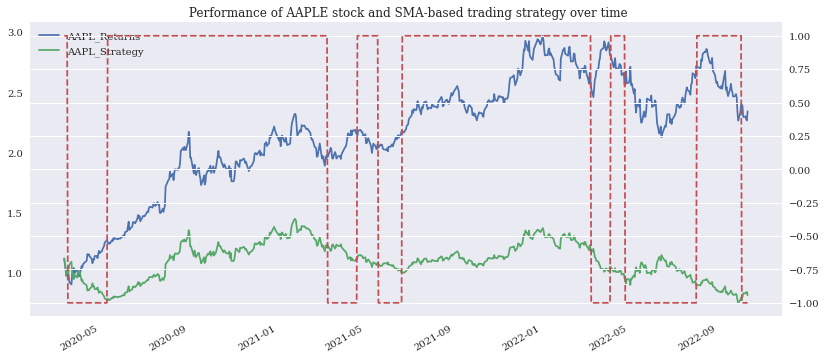

In [49]:
ax = df1[['AAPL_Returns', 'AAPL_Strategy']].cumsum(
                 ).apply(np.exp).plot(figsize=(12, 6))
df1['AAPL_Position'].plot(ax=ax, secondary_y='AAPL_Position', style='--', title =' Performance of AAPLE stock and SMA-based trading strategy over time')
ax.get_legend();

#### Vectorized Backtesting for MICROSOFT stock

First the log returns are calculated and then the positions are multiplied with relevant returns.

The long position earns the positive return of amazon stock price and short position earns the negative return of amazon stock.

In [50]:
df1['MSFT_Returns'] = np.log(df1['MSFT'] / df1['MSFT'].shift(1))  

df1['MSFT_Strategy'] = df1['MSFT_Position'].shift(1) * df1['MSFT_Returns']  

df1.round(4).head()

,SPY,AAPL,MSFT,SPY_SMA1,SPY_SMA2,AAPL_SMA1,AAPL_SMA2,MSFT_SMA1,MSFT_SMA2,SPY_Position,AAPL_Position,MSFT_Position,SPY_Returns,SPY_Strategy,AAPL_Returns,AAPL_Strategy,MSFT_Returns,MSFT_Strategy
2020-03-13,0.9043,1.1878,1.1440,1.0241,1.0572,1.2505,1.2173,1.2064,1.1423,-1,1,1,0.0820,-0.0820,0.1132,0.1132,NaN,NaN
2020-03-16,0.8054,1.0350,0.9754,1.0077,1.0553,1.2328,1.2174,1.1886,1.1422,-1,1,1,-0.1159,0.1159,-0.1377,-0.1377,-0.1595,-0.1595
2020-03-17,0.8488,1.0805,1.0557,0.9936,1.0537,1.2187,1.2180,1.1742,1.1430,-1,1,1,0.0526,-0.0526,0.0430,0.0430,0.0791,0.0791
2020-03-18,0.8059,1.0541,1.0113,0.9771,1.0518,1.2022,1.2182,1.1573,1.1433,-1,-1,1,-0.0520,0.0520,-0.0248,-0.0248,-0.0430,-0.0430
2020-03-19,0.8076,1.0460,1.0279,0.9609,1.0498,1.1861,1.2183,1.1423,1.1435,-1,-1,-1,0.0021,-0.0021,-0.0077,0.0077,0.0163,0.0163


In [51]:
df1.dropna(inplace=True)

np.exp(df1[['MSFT_Returns', 'MSFT_Strategy']].sum())  

MSFT_Returns     1.508600
MSFT_Strategy    1.159045
dtype: float64

In [52]:
df1[['MSFT_Returns', 'MSFT_Strategy']].std() * 252 ** 0.5  

MSFT_Returns     0.319601
MSFT_Strategy    0.319737
dtype: float64

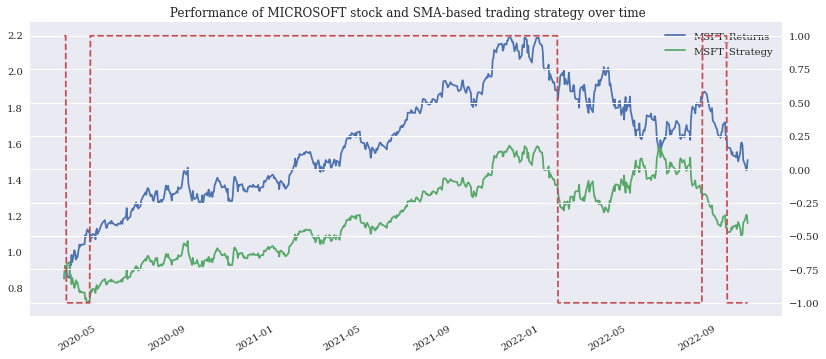

In [53]:
ax = df1[['MSFT_Returns', 'MSFT_Strategy']].cumsum(
                 ).apply(np.exp).plot(figsize=(12, 6))
df1['MSFT_Position'].plot(ax=ax, secondary_y='MSFT_Position', style='--', title =' Performance of MICROSOFT stock and SMA-based trading strategy over time')
ax.get_legend();

### Optimization

#### Optimization of SPY stock

So far we have taken our simple moving average (SMA) values as 20, and 100. Are the chosen SMA parameters are the right ones? Generally, investors prefer higher returns to lower returns ceteris paribus. So, we might be inclined to search for those parameters that maximize the return over the relevant period.

Now we calculate the whole vectorized backtesting for different parameters combinations for SPY, Apple and Microsoft stock and records the results, and find a ranking afterward.

We have considered the parameter values as sma1 = range(10,61,4) and sma2 = range(20,130,11)

In [54]:
from itertools import product

# parameter values for SMA1 and SMA2
sma1 = range(10,61,4) 
sma2 = range(20,130,11)

results = pd.DataFrame()
for SPY_SMA1, SPY_SMA2 in product(sma1, sma2):  # combine values of SMA1 and SMA2
    data = pd.DataFrame(df['SPY'])
    data.dropna(inplace=True)
    data['SPY_Returns'] = np.log(data['SPY'] / data['SPY'].shift(1))
    data['SPY_SMA1'] = data['SPY'].rolling(SPY_SMA1).mean()
    data['SPY_SMA2'] = data['SPY'].rolling(SPY_SMA2).mean()
    data.dropna(inplace=True)
    data['SPY_Position'] = np.where(data['SPY_SMA1'] > data['SPY_SMA2'], 1, -1)
    data['SPY_Strategy'] = data['SPY_Position'].shift(1) * data['SPY_Returns']
    data.dropna(inplace=True)
    perf = np.exp(data[['SPY_Returns', 'SPY_Strategy']].sum())
    results = results.append(pd.DataFrame(
             {'SPY_SMA1': SPY_SMA1, 'SPY_SMA2': SPY_SMA2,
              'SPY_MARKET': perf['SPY_Returns'],
              'SPY_STRATEGY': perf['SPY_Strategy'],
              'SPY_OUT': perf['SPY_Strategy'] - perf['SPY_Returns']},
               index=[0]), ignore_index= True)   # Records the vectorized backtesting results in a DataFrame object.

In [55]:
results.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 130 entries, 0 to 129
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   SPY_SMA1      130 non-null    int64  
 1   SPY_SMA2      130 non-null    int64  
 2   SPY_MARKET    130 non-null    float64
 3   SPY_STRATEGY  130 non-null    float64
 4   SPY_OUT       130 non-null    float64
dtypes: float64(3), int64(2)
memory usage: 5.2 KB


The result shows the seven best performing parameter combinations of all the backtested. Ranking is implemented based on the outperformance of algorithmic trading strategy compared with benchmark investment. The benchmark investment performance varies as the SMA2 parameter influences the time interval length and data set on which the backtest implemented.

In [56]:
results.sort_values('SPY_OUT', ascending=False).head(7)

,SPY_SMA1,SPY_SMA2,SPY_MARKET,SPY_STRATEGY,SPY_OUT
42,26,42,1.201961,1.422010,0.220049
31,22,31,1.221808,1.413244,0.191436
7,10,97,1.284703,1.451411,0.166708
113,54,53,1.185285,1.325555,0.140270
122,58,42,1.169900,1.305196,0.135296
5,10,75,1.161332,1.287614,0.126283
6,10,86,1.134138,1.259632,0.125494


From the SPY optimization, we get SMA1 = 26 and SMA2 = 42 as the optimal parameters.

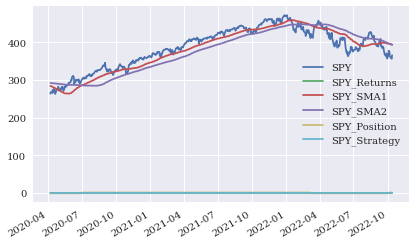

In [57]:
data.plot()

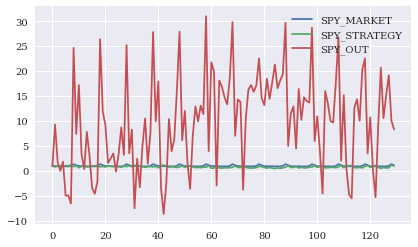

In [58]:
result = results/results.iloc[0] 
result[['SPY_MARKET', 'SPY_STRATEGY','SPY_OUT']].plot()

#### Optimization of AAPLE stock

In [59]:
# parameter values for SMA1 and SMA2
sma1 = range(10,61,4) 
sma2 = range(20,130,11)
results = pd.DataFrame()
for AAPL_SMA1, AAPL_SMA2 in product(sma1, sma2):  # combine values of SMA1 and SMA2
    data = pd.DataFrame(df['AAPL'])
    data.dropna(inplace=True)
    data['AAPL_Returns'] = np.log(data['AAPL'] / data['AAPL'].shift(1))
    data['AAPL_SMA1'] = data['AAPL'].rolling(AAPL_SMA1).mean()
    data['AAPL_SMA2'] = data['AAPL'].rolling(AAPL_SMA2).mean()
    data.dropna(inplace=True)
    data['AAPL_Position'] = np.where(data['AAPL_SMA1'] > data['AAPL_SMA2'], 1, -1)
    data['AAPL_Strategy'] = data['AAPL_Position'].shift(1) * data['AAPL_Returns']
    data.dropna(inplace=True)
    perf = np.exp(data[['AAPL_Returns', 'AAPL_Strategy']].sum())
    results = results.append(pd.DataFrame(
             {'AAPL_SMA1': AAPL_SMA1, 'AAPL_SMA2': AAPL_SMA2,
              'AAPL_MARKET': perf['AAPL_Returns'],
              'AAPL_STRATEGY': perf['AAPL_Strategy'],
              'AAPL_OUT': perf['AAPL_Strategy'] - perf['AAPL_Returns']},
              index=[0]), ignore_index=True)   # Records the vectorized backtesting results in a DataFrame object.

In [60]:
results.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 130 entries, 0 to 129
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   AAPL_SMA1      130 non-null    int64  
 1   AAPL_SMA2      130 non-null    int64  
 2   AAPL_MARKET    130 non-null    float64
 3   AAPL_STRATEGY  130 non-null    float64
 4   AAPL_OUT       130 non-null    float64
dtypes: float64(3), int64(2)
memory usage: 5.2 KB


In [61]:
results.sort_values('AAPL_OUT', ascending=False).head(7)

,AAPL_SMA1,AAPL_SMA2,AAPL_MARKET,AAPL_STRATEGY,AAPL_OUT
20,18,20,2.203872,3.248676,1.044805
112,54,42,1.959647,2.153631,0.193984
122,58,42,1.882433,1.939985,0.057551
0,10,20,2.203872,2.246231,0.042359
10,14,20,2.203872,2.098001,-0.105871
127,58,97,2.011825,1.885975,-0.125850
102,50,42,2.011242,1.791896,-0.219346


From the SPY optimization, we get SMA1 = 18 and SMA2 = 20 as the optimal parameters

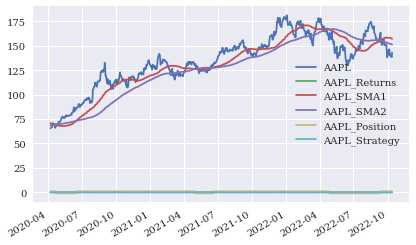

In [62]:
data.plot()

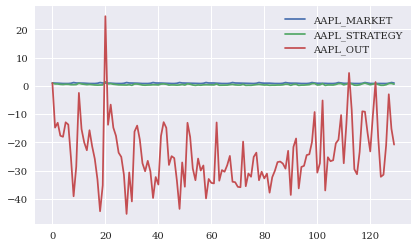

In [63]:
result = results/results.iloc[0] 
result[['AAPL_MARKET', 'AAPL_STRATEGY','AAPL_OUT']].plot()

#### Optimization of MICROSOFT stock

In [64]:
# parameter values for SMA1 and SMA2
sma1 = range(10,61,4) 
sma2 = range(20,130,11)
results = pd.DataFrame()
for MSFT_SMA1, MSFT_SMA2 in product(sma1, sma2):   # combine values of SMA1 and SMA2
    data = pd.DataFrame(df['MSFT'])
    data.dropna(inplace=True)
    data['MSFT_Returns'] = np.log(data['MSFT'] / data['MSFT'].shift(1))
    data['MSFT_SMA1'] = data['MSFT'].rolling(MSFT_SMA1).mean()
    data['MSFT_SMA2'] = data['MSFT'].rolling(MSFT_SMA2).mean()
    data.dropna(inplace=True)
    data['MSFT_Position'] = np.where(data['MSFT_SMA1'] > data['MSFT_SMA2'], 1, -1)
    data['MSFT_Strategy'] = data['MSFT_Position'].shift(1) * data['MSFT_Returns']
    data.dropna(inplace=True)
    perf = np.exp(data[['MSFT_Returns', 'MSFT_Strategy']].sum())
    results = results.append(pd.DataFrame(
             {'MSFT_SMA1': MSFT_SMA1, 'MSFT_SMA2': MSFT_SMA2,
              'MSFT_MARKET': perf['MSFT_Returns'],
              'MSFT_STRATEGY': perf['MSFT_Strategy'],
              'MSFT_OUT': perf['MSFT_Strategy'] - perf['MSFT_Returns']},
              index=[0]), ignore_index=True)   # Records the vectorized backtesting results in a DataFrame object.

In [65]:
results.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 130 entries, 0 to 129
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSFT_SMA1      130 non-null    int64  
 1   MSFT_SMA2      130 non-null    int64  
 2   MSFT_MARKET    130 non-null    float64
 3   MSFT_STRATEGY  130 non-null    float64
 4   MSFT_OUT       130 non-null    float64
dtypes: float64(3), int64(2)
memory usage: 5.2 KB


In [66]:
results.sort_values('MSFT_OUT', ascending=False).head(7)

,MSFT_SMA1,MSFT_SMA2,MSFT_MARKET,MSFT_STRATEGY,MSFT_OUT
119,54,119,1.465599,2.340183,0.874583
129,58,119,1.465599,2.303178,0.837579
88,42,108,1.762104,2.488501,0.726397
9,10,119,1.465599,2.048620,0.583021
128,58,108,1.762104,2.297055,0.534951
99,46,119,1.465599,1.993122,0.527522
109,50,119,1.465599,1.912637,0.447038


From the SPY optimization, we get SMA1 = 54 and SMA2 = 119 as the optimal parameters

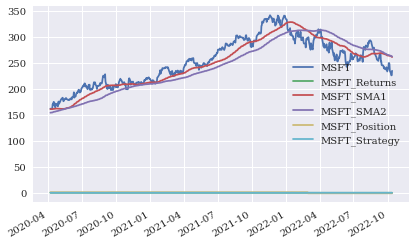

In [67]:
data.plot()

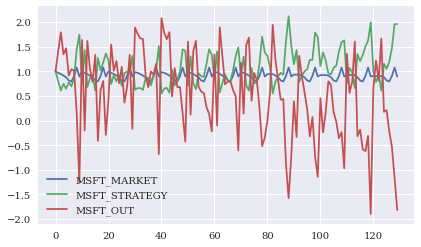

In [68]:
result = results/results.iloc[0] 
result[['MSFT_MARKET', 'MSFT_STRATEGY','MSFT_OUT']].plot()

### Random Walk Hypothesis

For many years, economists, statisticians, and teachers of finance have been interested in developing and testing models of stock price behavior. One important model that has evolved from this research is the theory of random walks

The random walk hypothesis (RWH) approach says that the predictive approaches should not lead to any outperformance at all. 

In this project we have tested RWH on historical market price of SPY, where we have created 5 lag versions.

Next, based on these lagged market prices, the OLS regression is used to predict the market prices.

With this, the idea is that we can predict today's market price based on yesterday and four more days back market prices.

#### Create five lagged versions of the historical end-of-day closing levels of the SPY stock index

In [69]:
data = pd.DataFrame(df['SPY'])

lags = 5
cols = []
for lag in range(1, lags + 1):
 col = 'lag_{}'.format(lag)   # Defines a column name for the current lag value.
 data[col] = data['SPY'].shift(lag)  # Creates the lagged version of the market prices for the current lag value.
 cols.append(col)  # Collects the column names for later reference.

data.head(7)

,SPY,lag_1,lag_2,lag_3,lag_4,lag_5
2019-10-17,285.208099,NaN,NaN,NaN,NaN,NaN
2019-10-18,283.959747,285.208099,NaN,NaN,NaN,NaN
2019-10-21,285.884735,283.959747,285.208099,NaN,NaN,NaN
2019-10-22,284.950806,285.884735,283.959747,285.208099,NaN,NaN
2019-10-23,285.779907,284.950806,285.884735,283.959747,285.208099,NaN
2019-10-24,286.246918,285.779907,284.950806,285.884735,283.959747,285.208099
2019-10-25,287.419067,286.246918,285.779907,284.950806,285.884735,283.959747


In [70]:
data.dropna(inplace=True)

In [71]:
data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 749 entries, 2019-10-24 to 2022-10-13
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   SPY     749 non-null    float64
 1   lag_1   749 non-null    float64
 2   lag_2   749 non-null    float64
 3   lag_3   749 non-null    float64
 4   lag_4   749 non-null    float64
 5   lag_5   749 non-null    float64
dtypes: float64(6)
memory usage: 41.0 KB


### Linear OLS regression

Here we apply linear regression for predicting the direction of market movements based on historical log returns.

To keep things simple, only two features are used. 

The lag_1 represents the log returns of the financial time series lagged by one day and lag_2, lags the log returns by two days. The lagged log returns might be useful in predicting future returns.

In [72]:
data = pd.DataFrame(df['SPY'])
data['returns'] = np.log(data / data.shift(1))
data.dropna(inplace=True)
data['direction'] = np.sign(data['returns']).astype(int)
data.head()

,SPY,returns,direction
2019-10-18,283.959747,-0.004387,-1
2019-10-21,285.884735,0.006756,1
2019-10-22,284.950806,-0.003272,-1
2019-10-23,285.779907,0.002905,1
2019-10-24,286.246918,0.001633,1


#### Frequency distribution of the daily historical log returns for SPY

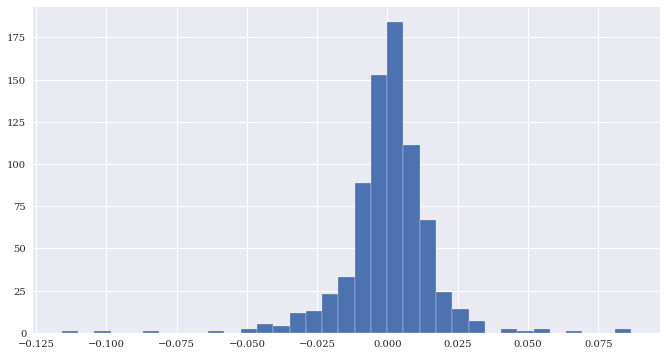

In [73]:
data['returns'].hist(bins=35, figsize=(10, 6))

#### Create the features data by lagging the log returns

In [74]:
lags = 2
def create_lags(data):
     global cols
     cols = []
     for lag in range(1, lags + 1):
         col = 'lag_{}'.format(lag)
         data[col] = data['returns'].shift(lag)
         cols.append(col)
create_lags(data)
data.head()

,SPY,returns,direction,lag_1,lag_2
2019-10-18,283.959747,-0.004387,-1,NaN,NaN
2019-10-21,285.884735,0.006756,1,-0.004387,NaN
2019-10-22,284.950806,-0.003272,-1,0.006756,-0.004387
2019-10-23,285.779907,0.002905,1,-0.003272,0.006756
2019-10-24,286.246918,0.001633,1,0.002905,-0.003272


#### Visualize data with lagging log returns and returns data

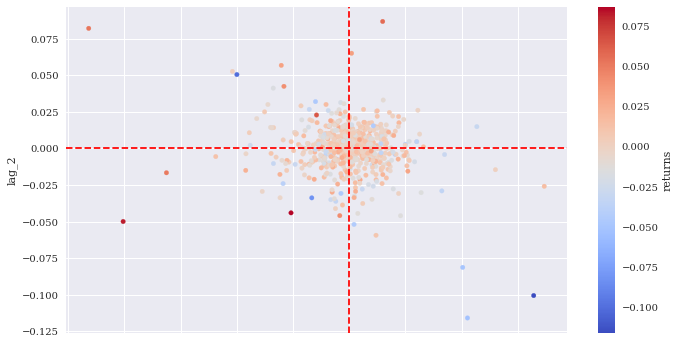

In [75]:
data.dropna(inplace=True)
data.plot.scatter(x='lag_1', y='lag_2', c='returns',
                           cmap='coolwarm', figsize=(10, 6), colorbar=True)
plt.axvline(0, c='r', ls='--')
plt.axhline(0, c='r', ls='--');

### Regression

The linear OLS Regression is useful in knowing any potential linear relationships for predicting market movements based on the features, and to backtest a trading strategy based on the predictions.

Generally there are two approaches:

using log returns
using direction data as the dependent variable during regression.

In both the cases predictions are transformed to either +1 or -1 to work with the direction of the prediction.

In [76]:
from sklearn.linear_model import LinearRegression 

model = LinearRegression() # The linear OLS regression implementation from scikit-learn is used.

# The regression is implemented on the log returns directly and on the direction data which is of primary interest.
data['pos_ols_1'] = model.fit(data[cols],
                                       data['returns']).predict(data[cols]) 
data['pos_ols_2'] = model.fit(data[cols],
                                       data['direction']).predict(data[cols])

data[['pos_ols_1', 'pos_ols_2']].head()

,pos_ols_1,pos_ols_2
2019-10-22,-0.001357,0.056017
2019-10-23,0.001752,0.136328
2019-10-24,-0.000564,0.075176
2019-10-25,0.000435,0.102950
2019-10-28,-0.000142,0.088665


In [77]:
# the real-valued predictions are transformed to directional values (+1, -1).
data[['pos_ols_1', 'pos_ols_2']] = np.where(
                     data[['pos_ols_1', 'pos_ols_2']] > 0, 1, -1)
data['pos_ols_1'].value_counts()  # The two approaches yield different directional predictions in general.


 1    425
-1    326
Name: pos_ols_1, dtype: int64

In [78]:
data['pos_ols_2'].value_counts() 

 1    689
-1     62
Name: pos_ols_2, dtype: int64

In [79]:
(data['pos_ols_1'].diff() != 0).sum()

490

In [80]:
(data['pos_ols_2'].diff() != 0).sum()

123

In [81]:
data['strat_ols_1'] = data['pos_ols_1'] * data['returns']
data['strat_ols_2'] = data['pos_ols_2'] * data['returns']

data[['returns', 'strat_ols_1', 'strat_ols_2']].sum().apply(np.exp)

returns        1.280131
strat_ols_1    2.189036
strat_ols_2    2.881692
dtype: float64

In [82]:
(data['direction'] == data['pos_ols_1']).value_counts() #Shows the number of correct and false predictions by the strategies.

True     415
False    336
dtype: int64

In [83]:
(data['direction'] == data['pos_ols_2']).value_counts() #Shows the number of correct and false predictions by the strategies.

True     420
False    331
dtype: int64

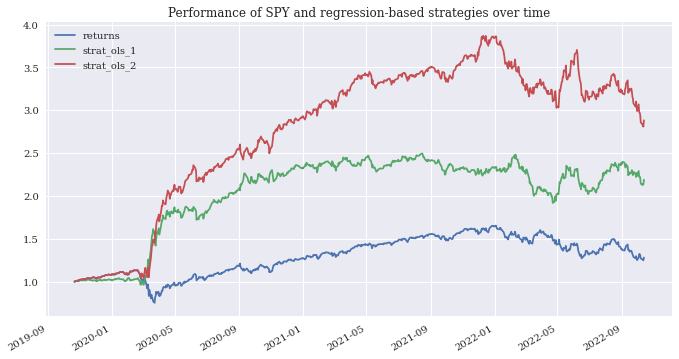

In [84]:
data[['returns', 'strat_ols_1', 'strat_ols_2']].cumsum(
                 ).apply(np.exp).plot(figsize=(10, 6), title ='Performance of SPY and regression-based strategies over time');

The vectorized backtesting is helpful to judge the performance of the resulting trading strategies.